In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\anjal\Downloads\IMDb Movies India.csv.zip", encoding='latin1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.shape

(15509, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

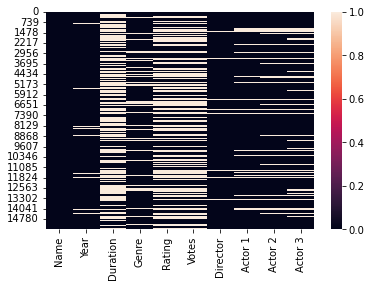

In [8]:
sns.heatmap(df.isnull());

In [9]:
missing_count = df.isnull().sum().sort_values(ascending=False)
missing_percent = (round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent], 
                       axis=1, 
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Duration,8269,53.32
Rating,7590,48.94
Votes,7589,48.93
Actor 3,3144,20.27
Actor 2,2384,15.37
Genre,1877,12.10
Actor 1,1617,10.43
Year,528,3.40
Director,525,3.39
Name,0,0.00


In [10]:
df.dropna(subset=['Rating'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    26.11
Actor 3      3.69
Actor 2      2.53
Actor 1      1.58
Genre        1.29
Director     0.06
Name         0.00
Year         0.00
Rating       0.00
Votes        0.00
dtype: float64

In [11]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

Duration    25.13
Name         0.00
Year         0.00
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.00
Actor 1      0.00
Actor 2      0.00
Actor 3      0.00
dtype: float64

In [12]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [14]:
df[['Rating', 'Duration', 'Votes']].describe(percentiles=[0.75,0.8, 0.9, 0.95, 0.98])

,Rating,Duration
count,7558.000000,7558.000000
mean,5.811127,133.439124
std,1.368255,21.908841
min,1.100000,21.000000
50%,6.000000,133.439124
75%,6.800000,144.000000
80%,7.000000,149.000000
90%,7.400000,160.000000
95%,7.800000,169.000000
98%,8.200000,180.000000


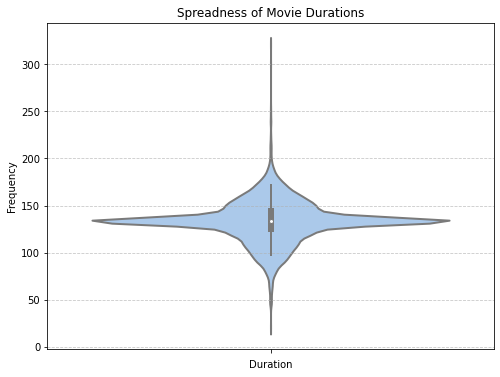

In [15]:

# Create a violin plot with different visual parameters
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Duration'], palette='pastel', linewidth=2)
plt.title('Spreadness of Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


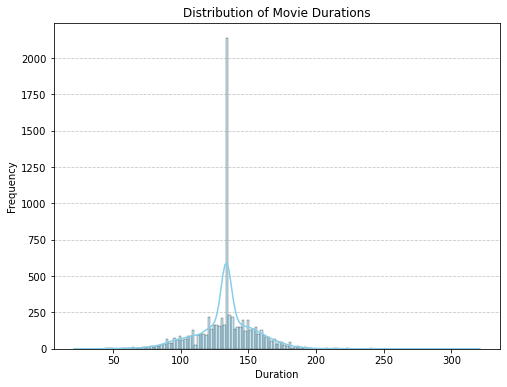

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Duration'], kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


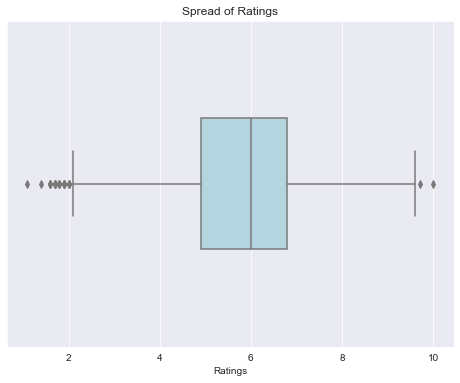

In [17]:
plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
sns.boxplot(x=df['Rating'], color='lightblue', width=0.4)
plt.title('Spread of Ratings')
plt.xlabel('Ratings')
plt.show()


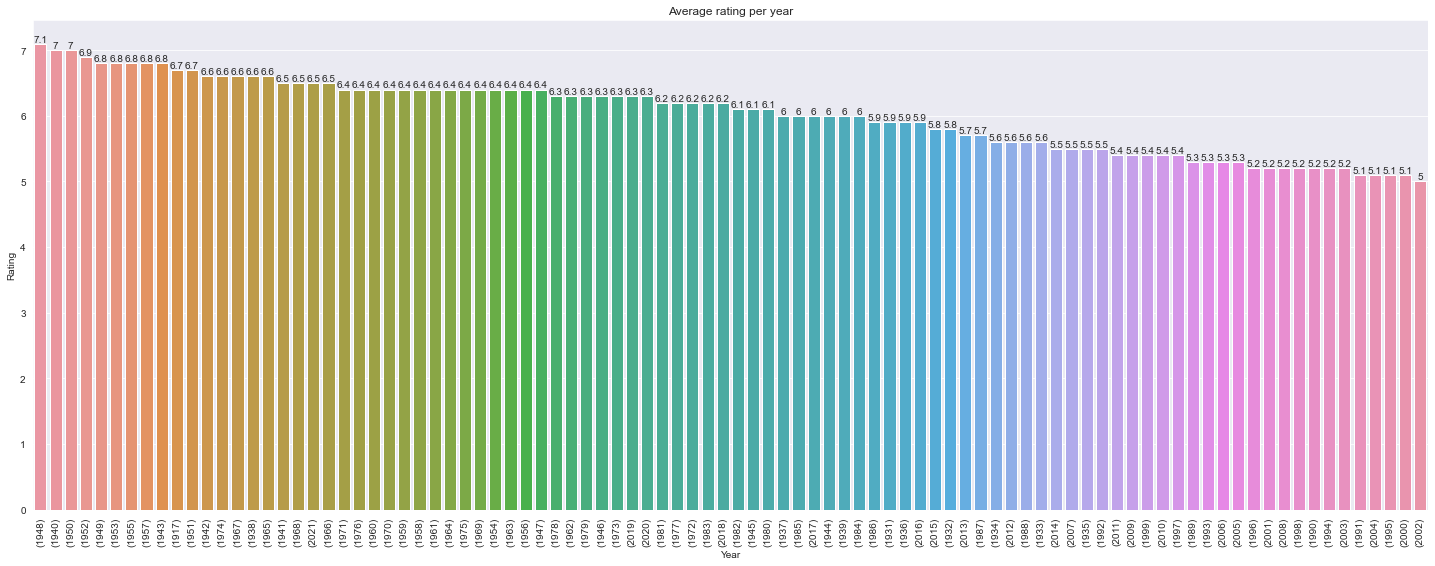

In [18]:
# Average rating per year
year_rating = df.groupby('Year').agg({'Rating': 'mean'}).reset_index().sort_values(by='Rating',
                                                                     ascending=False,
                                                                     )
year_rating['Rating'] = round(year_rating['Rating'],1)

plt.figure(figsize=(25,9))
ax = sns.barplot(data=year_rating, x='Year', y='Rating')
ax.bar_label(ax.containers[0])
plt.title('Average rating per year')
plt.xticks(rotation=90)
plt.show()

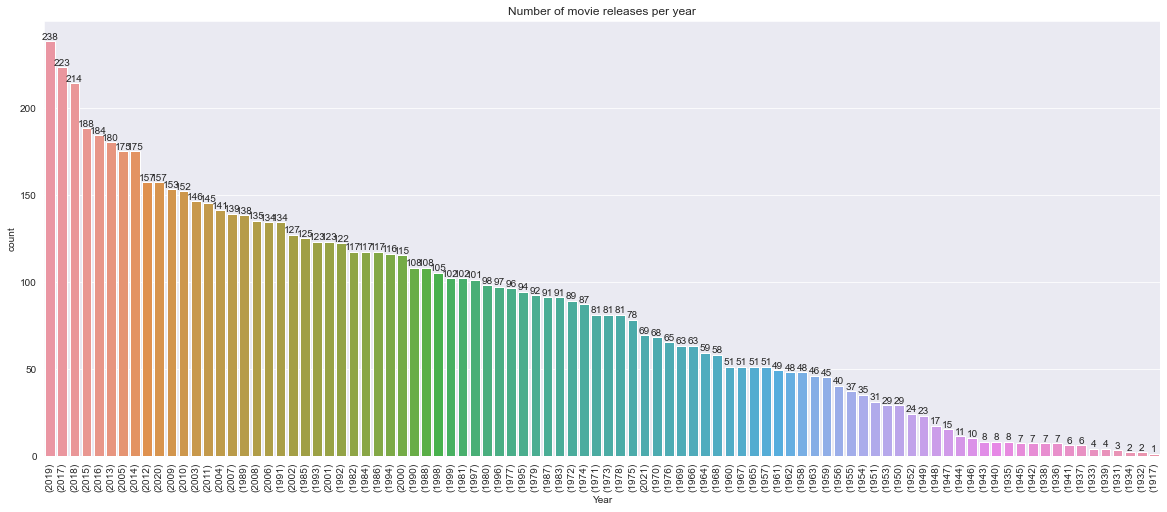

In [19]:
# Number of movie release per year
year_count = df.groupby('Year').agg({'Name':'count'}).rename(columns={'Name':'count'}).\
                                        sort_values(by='count', ascending=False).reset_index()
plt.figure(figsize=(20,8))
ax = sns.barplot(data=year_count, x='Year', y='count')
ax.bar_label(ax.containers[0])
plt.title('Number of movie releases per year')
plt.xticks(rotation=90)
plt.show()

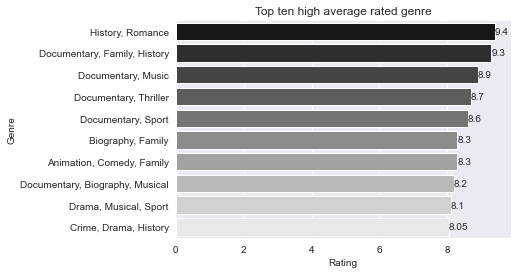

In [20]:
# plot top ten high average rated genre 
genre_rate = df.groupby('Genre').agg({'Rating':'mean'}).sort_values(by='Rating', ascending=False)\
                                .reset_index().head(10)

ax = sns.barplot(data=genre_rate, x='Rating', y='Genre', palette='gist_gray')
ax.bar_label(ax.containers[0])
plt.title('Top ten high average rated genre')
plt.show()

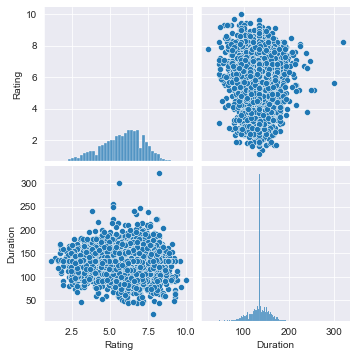

In [21]:
sns.pairplot(df[['Votes', 'Rating', 'Duration']]);

# Feature Engineering

In [22]:
df_update = df.drop(['Name'], axis=1)

In [23]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      7558 non-null   object 
 1   Duration  7558 non-null   float64
 2   Genre     7558 non-null   object 
 3   Rating    7558 non-null   float64
 4   Votes     7558 non-null   object 
 5   Director  7558 non-null   object 
 6   Actor 1   7558 non-null   object 
 7   Actor 2   7558 non-null   object 
 8   Actor 3   7558 non-null   object 
dtypes: float64(2), object(7)
memory usage: 590.5+ KB


In [24]:
actor1_encoding_map = df_update.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2_encoding_map = df_update.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3_encoding_map = df_update.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director_encoding_map = df_update.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre_encoding_map = df_update.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [25]:
df_update['actor1_encoded'] = round(df_update['Actor 1'].map(actor1_encoding_map['Rating']),1)
df_update['actor2_encoded'] = round(df_update['Actor 2'].map(actor2_encoding_map['Rating']),1)
df_update['actor3_encoded'] = round(df_update['Actor 3'].map(actor3_encoding_map['Rating']),1)
df_update['director_encoded'] = round(df_update['Director'].map(director_encoding_map['Rating']),1)
df_update['genre_encoded'] = round(df_update['Genre'].map(genre_encoding_map['Rating']),1)

In [26]:
df_update.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director', 'Genre'], axis=1, inplace=True)
df_update.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,(2019),109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,(2019),110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,(1997),147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,(2005),142.0,7.4,"1,086",5.3,6.0,6.5,7.5,6.8
8,(2012),82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


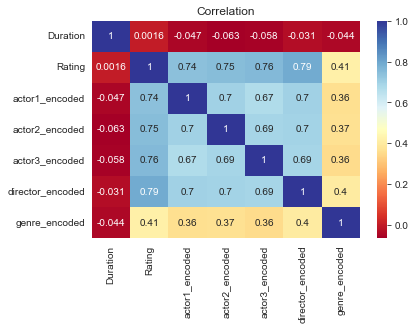

In [27]:
sns.heatmap(df_update.corr(), annot=True, cmap='RdYlBu')
plt.title('Correlation')
plt.show()

In [28]:
X = df_update.drop('Rating', axis=1)
y = df_update['Rating']

X.head()

,Year,Duration,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,(2019),109.0,8,6.8,7.0,7.0,7.0,6.3
3,(2019),110.0,35,5.4,4.4,4.4,4.4,5.7
5,(1997),147.0,827,4.8,5.8,5.8,5.4,6.2
6,(2005),142.0,"1,086",5.3,6.0,6.5,7.5,6.8
8,(2012),82.0,326,5.6,5.9,5.6,5.6,5.5


In [29]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
print('Shape of training features: ', X_train.shape)
print('Shape of training target: ', y_train.shape)
print('Shape of testing features: ', X_test.shape)
print('Shape of testing target: ', y_test.shape)

Shape of training features:  (6046, 8)
Shape of training target:  (6046,)
Shape of testing features:  (1512, 8)
Shape of testing target:  (1512,)


In [32]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f"XGBoost R-squared: {xgb_r2}")

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting model
gb_predictions = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_predictions)
print(f"Gradient Boosting R-squared: {gb_r2}")


XGBoost R-squared: 0.8986637643384835
Gradient Boosting R-squared: 0.9266745052484818
